# Wine Quality Prediction

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [252]:
df_red = pd.read_csv('/Users/kimthoatran77/Documents/Machine Learning Projects/Wine Quality-2009/wine+quality/winequality-red.csv', sep=';')
df_white = pd.read_csv('/Users/kimthoatran77/Documents/Machine Learning Projects/Wine Quality-2009/wine+quality/winequality-white.csv', sep=';')

print(df_red.head())
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Visualize The Data

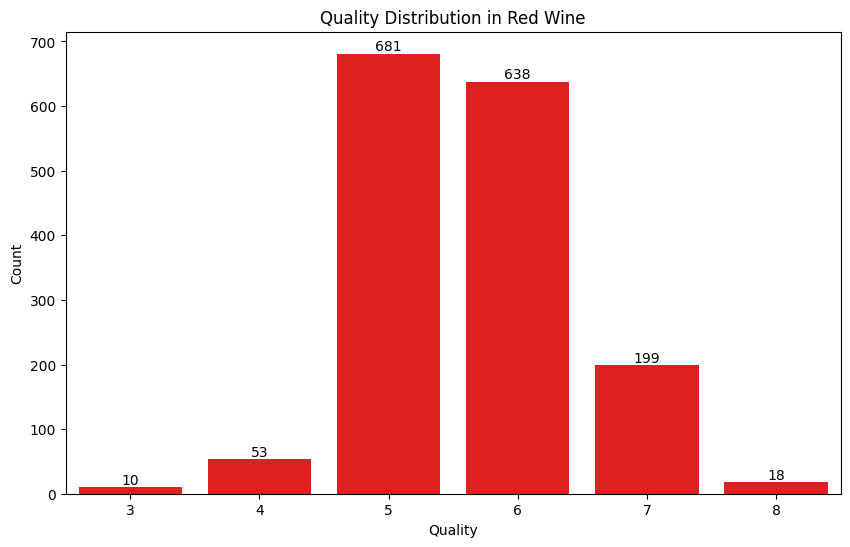

In [253]:
count_red = df_red['quality'].value_counts().sort_index()

plt.figure(figsize = (10, 6))
plot_red = sns.barplot(x = count_red.index, y = count_red.values, color='red')

for i, value in enumerate(count_red.values):
    plot_red.text(i, value, value, ha = 'center', va = 'bottom')

plt.title('Quality Distribution in Red Wine')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

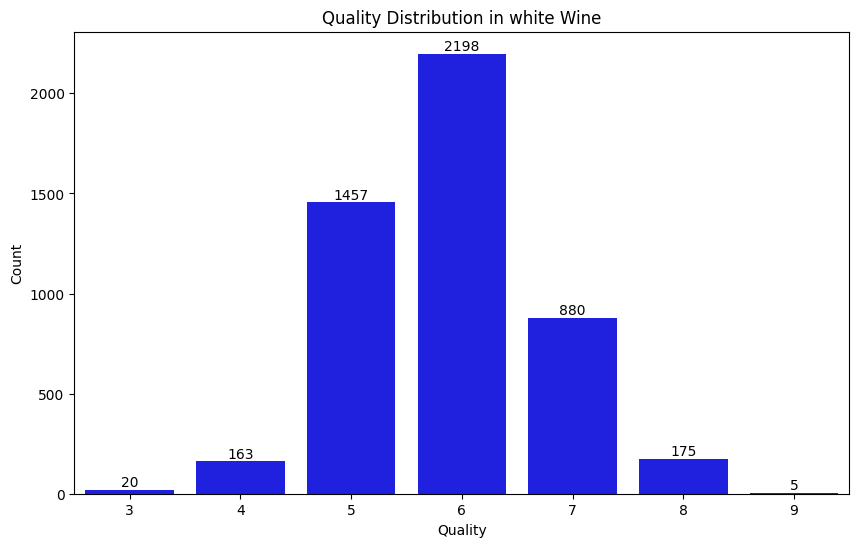

In [254]:
count_white = df_white['quality'].value_counts().sort_index()

plt.figure(figsize = (10, 6))
plot_white = sns.barplot(x = count_white.index, y = count_white.values, color = 'blue')

for i, value in enumerate(count_white.values):
    plot_white.text(i, value, value, ha = 'center', va = 'bottom')
    
plt.title('Quality Distribution in white Wine')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Those bar plots show the distribution of red and white datasets. In both datasets, the wine quality is rated the most on level 6, following level 5 & 7.

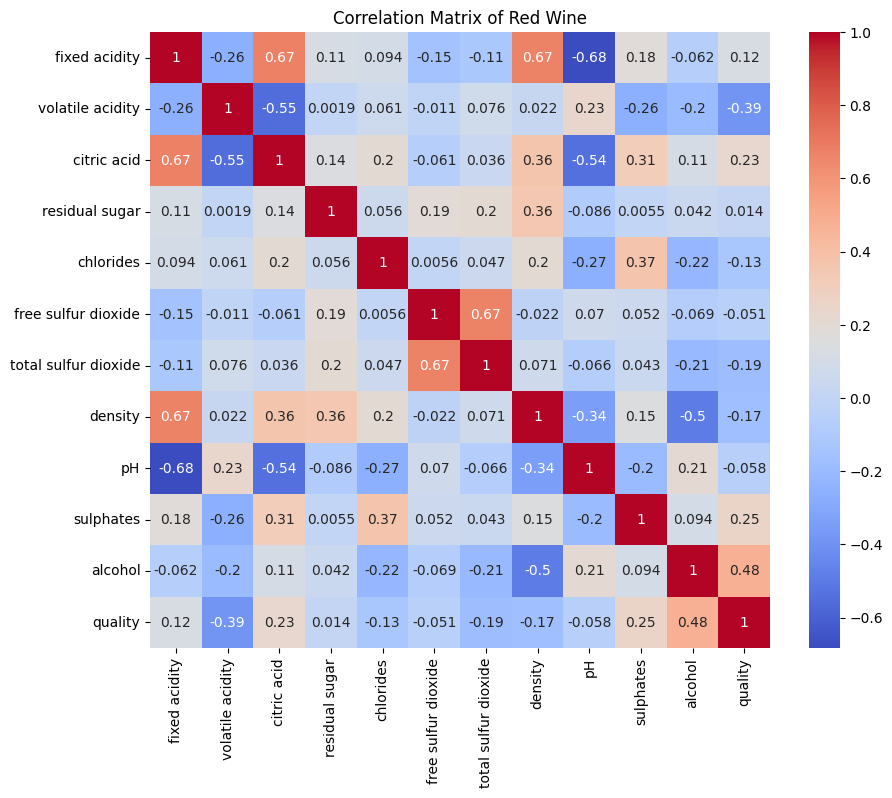

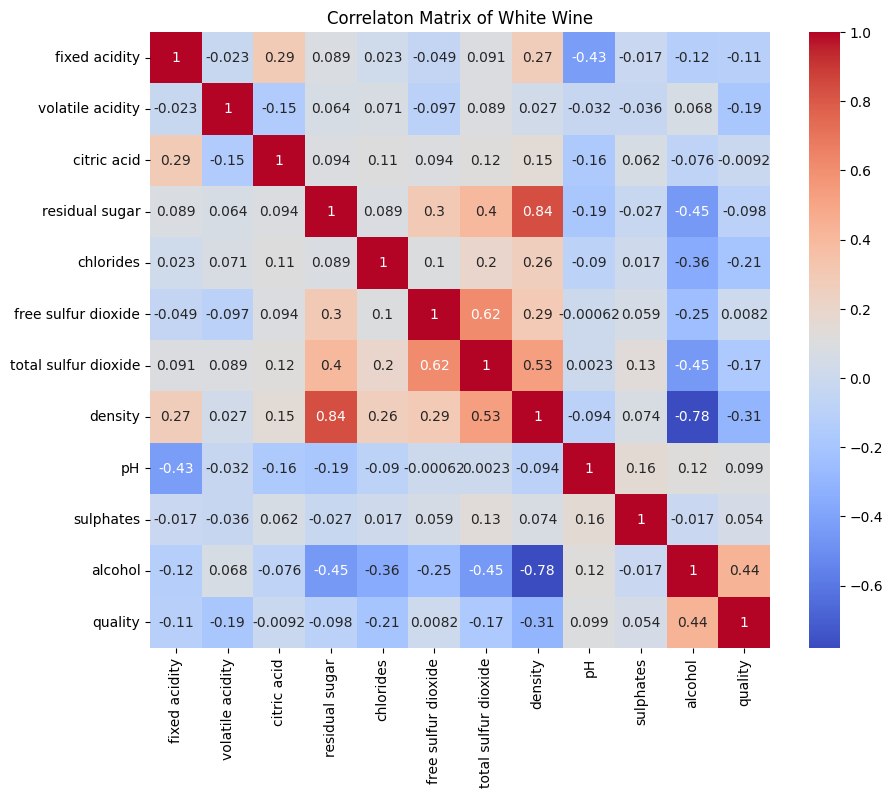

In [255]:
# Correlation Matrix

# Red Wine

plt.figure(figsize = (10, 8))
sns.heatmap(df_red.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Red Wine')
plt.show()


# White wine

plt.figure(figsize = (10, 8))
sns.heatmap(df_white.corr(), annot = True, cmap = "coolwarm")
plt.title('Correlaton Matrix of White Wine')
plt.show()

# Data Preprocessing

In [256]:
# Categorize the wine quality into two categories: 'low' and 'high'

def categorize_quality(quality):
    if quality <= 5:
        return 'low'
    else:
        return 'high'

df_red['quality_category'] = df_red['quality'].apply(categorize_quality)
df_white['quality_category'] = df_white['quality'].apply(categorize_quality)

In [257]:
# Label Encoding

le_red = LabelEncoder()
le_white = LabelEncoder()

df_red['quality'] = le_red.fit_transform(df_red['quality'])
df_white['quality'] = le_white.fit_transform(df_white['quality'])

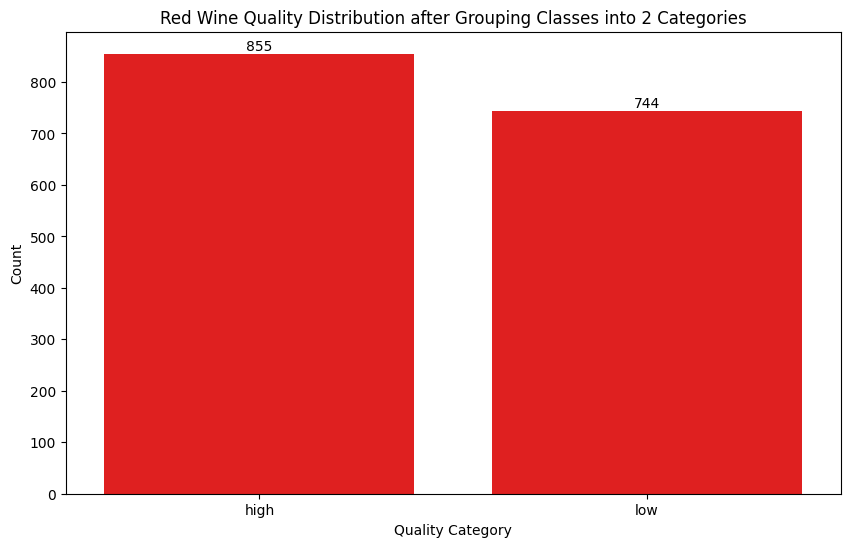

In [258]:
counts_red = df_red['quality_category'].value_counts().sort_index()

plt.figure(figsize = (10,6))
barplot_red = sns.barplot(x = counts_red.index, y = counts_red.values, color = 'red')

for i, value in enumerate(counts_red.values):
    barplot_red.text(i, value, value, ha = 'center', va = 'bottom')

plt.title("Red Wine Quality Distribution after Grouping Classes into 2 Categories")
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

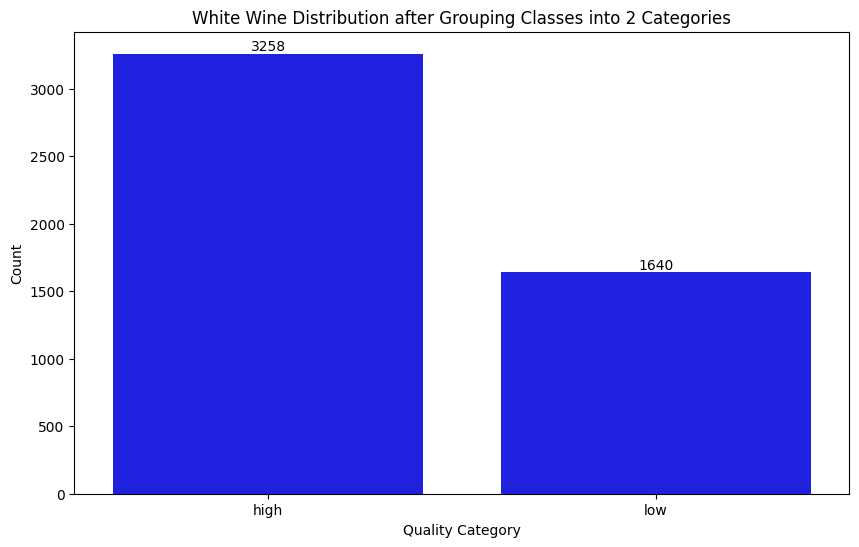

In [259]:
counts_white = df_white['quality_category'].value_counts().sort_index()

plt.figure(figsize = (10, 6))
barplot_white = sns.barplot(x = counts_white.index, y = counts_white.values, color = 'blue')

for i, value in enumerate(counts_white.values):
    barplot_white.text(i, value, value, ha = 'center', va = 'bottom')
    
plt.title("White Wine Distribution after Grouping Classes into 2 Categories")
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

# Splitting the data in a training set and test set

In [260]:
X_red = df_red.drop('quality_category', axis = 1)
y_red = df_red['quality_category']

X_white = df_white.drop('quality_category', axis =1)
y_white = df_white['quality_category']

# Spliting the dataset into a training set and test set
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size = 0.2, random_state = 42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size = 0.2, random_state = 42)

# Machine Learning Model for Red Wine

In [261]:
# K-Nearest Neighbors classifier

clf_knn_red = KNeighborsClassifier(n_neighbors = 3)

clf_knn_red.fit(X_train_red, y_train_red)

y_pred_knn_red = clf_knn_red.predict(X_test_red)

print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test_red, y_pred_knn_red, zero_division = 1))

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

        high       0.79      0.76      0.77       179
         low       0.71      0.74      0.72       141

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



# Applying Hyperparameter Tunning Using Grid Search

In [262]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 0)

grid.fit(X_train_red, y_train_red)

print(grid.best_params_)
print(grid.best_estimator_)

{'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(n_neighbors=3, p=1)


In [263]:
# Make predictions with the best model

best_predictions_red = grid.predict(X_test_red)

print("Classification Report for the Best Model:")
print(classification_report(y_test_red, best_predictions_red))

Classification Report for the Best Model:
              precision    recall  f1-score   support

        high       0.84      0.84      0.84       179
         low       0.80      0.79      0.80       141

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



In [264]:
# Perform cross-validation

best_model_red = grid.best_estimator_

scores = cross_val_score(best_model_red, X_train_red, y_train_red, cv=5)

print("Cross-validation scores:", scores)

print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.82421875 0.82421875 0.8515625  0.86328125 0.85882353]
Mean cross-validation score: 0.8444209558823529


# KNN Result Interpretation:

In conclusion, the K-Nearest Neighbors (KNN) classifier was applied to a red wine dataset. The baseline model, prior to hyperparameter tuning, achieved an accuracy of 75% on the test set. This indicates that the model was able to correctly predict the quality category of the wine 75% of the time. 

After hyperparameter tuning, the performance of the KNN model improved significantly. The accuracy increased to 82%, suggesting that the model was able to correctly predict the quality category of the wine 82% of the time on the test set. This improvement was observed across all metrics - precision, recall, and f1-score, for both 'high' and 'low' quality categories. 

The cross-validation scores, ranging from 0.8242 to 0.8633 with a mean score of 0.8444, confirmed the model's robustness and consistency across different subsets of the dataset. Therefore, the hyperparameter-tuned KNN model demonstrated superior performance compared to the baseline model in predicting the quality category of red wine.


# Machine Learning Model for White Wine Dataset

In [265]:
# K-Nearest Neighbors classifier

clf_knn_white = KNeighborsClassifier(n_neighbors = 3)

clf_knn_white.fit(X_train_white, y_train_white)

y_pred_knn_white = clf_knn_red.predict(X_test_white)

print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test_white, y_pred_knn_white, zero_division = 1))

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

        high       0.68      0.16      0.25       659
         low       0.33      0.85      0.47       321

    accuracy                           0.38       980
   macro avg       0.51      0.50      0.36       980
weighted avg       0.57      0.38      0.33       980



# Applying Hyperparameter Tunning

In [266]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 0)

grid.fit(X_train_white, y_train_white)

print(grid.best_params_)
print(grid.best_estimator_)

{'n_neighbors': 3, 'p': 1}
KNeighborsClassifier(n_neighbors=3, p=1)


In [267]:
# Make predictions with the best model

best_predictions_white = grid.predict(X_test_white)

print("Classification Report for the Best Model:")
print(classification_report(y_test_white, best_predictions_white))

Classification Report for the Best Model:
              precision    recall  f1-score   support

        high       0.85      0.89      0.87       659
         low       0.76      0.69      0.72       321

    accuracy                           0.83       980
   macro avg       0.81      0.79      0.80       980
weighted avg       0.82      0.83      0.82       980



In [268]:
# Perform cross-validation

best_model_white = grid.best_estimator_

scores = cross_val_score(best_model_white, X_train_white, y_train_white, cv=5)

print("Cross-validation scores:", scores)

print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.81377551 0.82142857 0.79081633 0.81736909 0.78671775]
Mean cross-validation score: 0.8060214507258842


# KNN Interpretation of White Wine Dataset

The K-Nearest Neighbors (KNN) classifier was applied to a white wine dataset with the same technique as the red wine dataset. The baseline white wine model, prior to hyperparameter tuning, achieved an accuracy of 38% on the test set. This indicates that the model was able to correctly predict the quality category of the wine 38% of the time. The performance of this base line model is very poor, so the hyperparameter tunning was applied to see how the model would be improved after this process, the performance of the KNN model did improve significantly after hyperparameter tunning. The accuracy increased to 83%, suggesting that the model was able to correctly predict the quality category of the wine 83% of the time on the test set. This improvement was observed across all metrics - precision, recall, and f1-score, for both 'high' and 'low' quality categories.

The cross-validation scores, ranging from 0.7908 to 0.8214 with a mean score of 0.8060, confirmed the model's robustness and consistency across different subsets of the dataset. Thus, the hyperparameter-tuned KNN model demonstrated superior performance compared to the baseline model in predicting the quality category of white wine.